<a href="https://colab.research.google.com/github/michaelsyao/AI_in_Finance/blob/main/01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
from pylab import plt, mpl
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
np.set_printoptions(precision=4, suppress=True)

In [4]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [5]:
x, y = make_blobs(n_samples=100, centers=4,
                  random_state=500, cluster_std=1.25)

In [6]:
y

array([1, 1, 2, 3, 2, 2, 1, 3, 2, 3, 3, 1, 3, 0, 0, 1, 3, 0, 3, 0, 0, 1,
       2, 3, 2, 2, 0, 0, 2, 1, 3, 2, 2, 0, 2, 1, 2, 1, 3, 3, 3, 2, 0, 0,
       1, 2, 3, 0, 3, 0, 1, 0, 2, 0, 2, 1, 2, 3, 0, 1, 2, 0, 1, 3, 1, 0,
       2, 2, 2, 3, 1, 2, 3, 0, 3, 1, 3, 0, 3, 3, 2, 1, 2, 1, 3, 3, 1, 3,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 2, 0, 0])

In [7]:
model = KMeans(n_clusters=4, random_state=0)

In [8]:
model.fit(x)

KMeans(n_clusters=4, random_state=0)

In [9]:
y_ = model.predict(x)

In [12]:
y_

array([0, 0, 2, 1, 2, 2, 0, 1, 2, 1, 1, 0, 1, 3, 3, 0, 1, 3, 1, 3, 3, 0,
       2, 1, 2, 2, 3, 3, 2, 0, 1, 2, 2, 3, 2, 0, 2, 0, 1, 1, 1, 2, 3, 3,
       0, 2, 1, 3, 1, 3, 0, 3, 2, 3, 2, 0, 2, 1, 3, 0, 2, 3, 0, 1, 0, 3,
       2, 2, 2, 1, 0, 2, 1, 3, 1, 0, 1, 3, 1, 1, 2, 0, 2, 0, 1, 1, 0, 1,
       3, 3, 3, 0, 0, 0, 0, 3, 0, 2, 3, 3], dtype=int32)

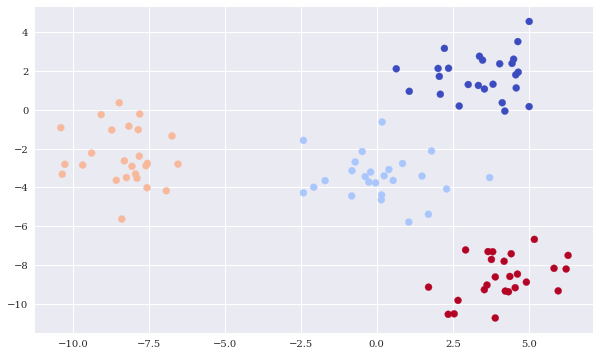

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(x[:, 0], x[:, 1], c=y_,  cmap='coolwarm');

## Reinforement Learning

In [14]:
ssp = [1, 1, 1, 1, 0]

In [15]:
asp = [1, 0]

In [26]:
def epoch():
    tr = 0
    for _ in range(100):
        a = np.random.choice(asp)
        s = np.random.choice(ssp)
        if a == s:
            tr += 1
    return tr

In [27]:
rl = np.array([epoch() for _ in range(15)])
rl

array([50, 43, 49, 52, 47, 46, 45, 52, 60, 54, 51, 51, 49, 49, 48])

In [28]:
rl.mean()

49.733333333333334

In [29]:
ssp = [1, 1, 1, 1, 0]

In [30]:
def epoch():
    tr = 0
    asp = [0, 1]
    for _ in range(100):
        a = np.random.choice(asp)
        s = np.random.choice(ssp)
        if a == s:
            tr += 1
        asp.append(s)
    return tr

In [32]:
rl = np.array([epoch() for _ in range(15)])
rl

array([63, 67, 66, 66, 84, 58, 72, 67, 65, 59, 74, 59, 68, 58, 69])

In [33]:
rl.mean()

66.33333333333333

## Supervised Learning

In [34]:
def f(x):
    return 2 * x ** 2 - x ** 3 / 3

In [36]:
x = np.linspace(-2, 4, 25)
x

array([-2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,
        0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,
        2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ])

In [38]:
y=f(x)

array([10.6667,  7.9115,  5.625 ,  3.776 ,  2.3333,  1.2656,  0.5417,
        0.1302,  0.    ,  0.1198,  0.4583,  0.9844,  1.6667,  2.474 ,
        3.375 ,  4.3385,  5.3333,  6.3281,  7.2917,  8.1927,  9.    ,
        9.6823, 10.2083, 10.5469, 10.6667])

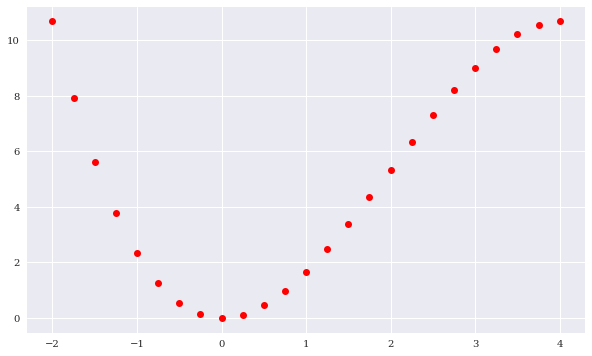

In [39]:
plt.figure(figsize = (10,6))
plt.plot(x, y, 'ro');

In [40]:
beta = np.cov(x, y, ddof=0)[0,1] / np.var(x)
beta

1.0541666666666667

In [41]:
alpha = y.mean() - beta * x.mean()
alpha

3.8625000000000003

In [42]:
y_ = alpha + beta * x

In [43]:
MSE = ((y - y_) ** 2).mean()
MSE

10.721953125